<h2>About this Project</h2>
<p>In this project, you will implement a linear support vector machine. You will generate a linearly separable dataset, write functions to build a linear SVM, and then visualize the decision boundary. You will also have the chance to add data points to a visualization of your linear SVM to see how it responds to new data.</p>

<h3>Evaluation</h3>

<p><strong>This project must be successfully completed and submitted in order to receive credit for this course. Your score on this project will be included in your final grade calculation.</strong><p>
    
<p>You are expected to write code where you see <em># YOUR CODE HERE</em> within the cells of this notebook. Not all cells will be graded; code input cells followed by cells marked with <em>#Autograder test cell</em> will be graded. Upon submitting your work, the code you write at these designated positions will be assessed using an "autograder" that will run all test cells to assess your code. You will receive feedback from the autograder that will identify any errors in your code. Use this feedback to improve your code if you need to resubmit. Be sure not to change the names of any provided functions, classes, or variables within the existing code cells, as this will interfere with the autograder. Also, remember to execute all code cells sequentially, not just those you’ve edited, to ensure your code runs properly.</p>
    
<p>You can resubmit your work as many times as necessary before the submission deadline. If you experience difficulty or have questions about this exercise, use the Q&A discussion board to engage with your peers or seek assistance from the instructor.<p>

<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>

<h3>Submit Code for Autograder Feedback</h3>

<p>Once you have completed your work on this notebook, you will submit your code for autograder review. Follow these steps:</p>

<ol>
  <li><strong>Save your notebook.</strong></li>
  <li><strong>Mark as Completed —</strong> In the blue menu bar along the top of this code exercise window, you’ll see a menu item called <strong>Education</strong>. In the <strong>Education</strong> menu, click <strong>Mark as Completed</strong> to submit your code for autograder/instructor review. This process will take a moment and a progress bar will show you the status of your submission.</li>
	<li><strong>Review your results —</strong> Once your work is marked as complete, the results of the autograder will automatically be presented in a new tab within the code exercise window. You can click on the assessment name in this feedback window to see more details regarding specific feedback/errors in your code submission.</li>
  <li><strong>Repeat, if necessary —</strong> The Jupyter notebook will always remain accessible in the first tabbed window of the exercise. To reattempt the work, you will first need to click <strong>Mark as Uncompleted</strong> in the <strong>Education</strong> menu and then proceed to make edits to the notebook. Once you are ready to resubmit, follow steps one through three. You can repeat this procedure as many times as necessary.</li>
<p>You can also download a copy of this notebook in multiple formats using the <strong>Download as</strong> option in the <strong>File</strong> menu above.</p>

<h2>Getting Started</h2>
<h3>Python Initialization</h3> 

Please run the following code to initialize your Python kernel. You should be running a version of Python 3.x. </p>

In [3]:
import numpy as np
from numpy.matlib import repmat
import sys
import time

from helper import *

import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import linregress

import pylab
from matplotlib.animation import FuncAnimation

%matplotlib notebook
print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.8


<h3>Generate and Visualize Data</h3>

Let's generate some linearly seperable data and visualize it in order to get a sense of what you will be working with. Run the cell below to generate and visualize the data.

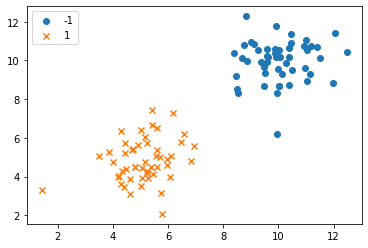

In [4]:
xTr, yTr = generate_data()
visualize_2D(xTr, yTr)

## Linear SVM

Recall that the unconstrained loss function formulation for linear SVM is 

$$
\ell (\mathbf{w}, b) = \underbrace{\mathbf{w}^\top \mathbf{w}}_{l_2 \text{ regularizer}} +  C \underbrace{\sum_{i=1}^{n} \max \left[ 1 - y_{i} \left( \mathbf{w}^\top \mathbf{x}_i+b \right),0 \right]}_{\text{hinge loss}}
$$

However, the hinge loss is not differentiable when $1-y_{i}\left( \mathbf{w}^\top \mathbf{x}_i+b \right)= 0$. So, we are going to use the squared hinge loss instead:

$$
\ell (\mathbf{w}, b) = \underbrace{\mathbf{w}^\top \mathbf{w}}_{l_{2} \text{ regularizer}} +  C \underbrace{\sum_{i=1}^{n} \max \left[ 1-y_{i} \left( \mathbf{w}^\top \mathbf{x}_i+b \right),0 \right]^2 }_{\text{squared hinge loss}}
$$

### Part One: Loss Function [Graded]

Firstly, implement the function **`loss`**, which takes in training data `xTr` ($n \times d$) and labels `yTr` with `yTr[i]` either `-1` or `1` and calculates $\ell(\mathbf{w}, b)$ using the **squared hinge loss** for the classifier parameterized by `w, b` with hyperparameter `C`.

You might find the function [`np.maximum(a, b)`](https://numpy.org/doc/stable/reference/generated/numpy.maximum.html) useful. It returns the element-wise maximum between each corresponding element of arrays `a` and `b`.

In [13]:
def loss(w, b, xTr, yTr, C):
    """
    Calculates the squared hinge loss plus the l2 regularizer, as defined in the equation above.
    
    Input:
        w     : d-dimensional weight vector
        b     : bias term, a scalar
        xTr   : nxd data matrix (each row is an input vector)
        yTr   : n-dimensional vector (each entry is a label)
        C     : scalar (constant that controls the tradeoff between l2-regularizer and hinge-loss)
    
    Output:
        loss_val : squared loss plus the l2 regularizer for the classifier on xTr and yTr, a scalar
    """
    
    loss_val = 0.0
    
    # YOUR CODE HERE
    n,d = xTr.shape
    wt=np.transpose(w)
    l2=np.dot(wt,w)
    
    for i in range(n):
        pred=(np.dot(wt,xTr[i])+b)
        hs= np.maximum((1-(yTr[i]*pred)),0)
        loss_val = loss_val + C*(hs**2)
    
    
    loss_val = np.sum(l2+loss_val)
    #print (type(loss_val))
    
    return loss_val

In [14]:
# These tests test whether your loss() is implemented correctly

xTr_test, yTr_test = generate_data()
n, d = xTr_test.shape

# Check whether your loss() returns a scalar
def loss_test1():
    w = np.random.rand(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 10)    
    return np.isscalar(loss_val)

# Check whether your loss() returns a nonnegative scalar
def loss_test2():
    w = np.random.rand(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 10)
    
    return loss_val >= 0

# Check whether you implement l2-regularizer correctly
def loss_test3():
    w = np.random.rand(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 0)
    loss_val_grader = loss_grader(w, b, xTr_test, yTr_test, 0)
    
    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implemented the squared hinge loss and not the standard hinge loss
# Note, loss_grader_wrong is the wrong implementation of the standard hinge-loss, 
# so the results should NOT match.
def loss_test4():
    w = np.random.randn(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 1)
    badloss = loss_grader_wrong(w, b, xTr_test, yTr_test, 1)    
    return not(np.linalg.norm(loss_val - badloss) < 1e-5)


# Check whether you implement square hinge loss correctly
def loss_test5():
    w = np.random.randn(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 10)
    loss_val_grader = loss_grader(w, b, xTr_test, yTr_test, 10)
    
    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implement loss correctly
def loss_test6():
    w = np.random.randn(d)
    b = np.random.rand(1)
    loss_val = loss(w, b, xTr_test, yTr_test, 100)
    loss_val_grader = loss_grader(w, b, xTr_test, yTr_test, 100)
    
    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

runtest(loss_test1,'loss_test1')
runtest(loss_test2,'loss_test2')
runtest(loss_test3,'loss_test3')
runtest(loss_test4,'loss_test4')
runtest(loss_test5,'loss_test5')
runtest(loss_test6,'loss_test6')

Running Test: loss_test1 ... ✔ Passed!
Running Test: loss_test2 ... ✔ Passed!
Running Test: loss_test3 ... ✔ Passed!
Running Test: loss_test4 ... ✔ Passed!
Running Test: loss_test5 ... ✔ Passed!
Running Test: loss_test6 ... ✔ Passed!


In [15]:
# Autograder test cell - worth 1 point
# runs loss_test1

In [16]:
# Autograder test cell - worth 1 point
# runs loss test2

In [17]:
# Autograder test cell - worth 1 point
# runs loss test3

In [18]:
# Autograder test cell - worth 1 point
# runs loss test4

In [19]:
# Autograder test cell - worth 1 point
# runs loss test5

In [20]:
# Autograder test cell - worth 1 point
# runs loss test5

### Part Two: Gradient of Loss Function [Graded]

Now, implement **`grad`**, which takes in the same arguments as the `loss` function but returns gradients of $\ell$ (with squared hinge loss) with respect to $\mathbf{w}$ and $b$.

Here are the equations for your reference:

$$
\nabla_{\mathbf{w}}\ell = 2 \mathbf{w} - 2C  \sum_{i=1}^{n} y_i \mathbf{x}_i \max \left[ 1 - y_{i} \left(\mathbf{w}^\top \mathbf{x}_i+b \right), 0 \right]
$$
$$
\nabla_b \ell = -2C \sum_{i=1}^{n} y_i \max \left[ 1-y_{i} \left(\mathbf{w}^\top \mathbf{x}_i+b \right), 0 \right]
$$

You might be able to reuse some of the code from your implementation of `loss` above.

In [48]:
def grad(w, b, xTr, yTr, C):
    """
    Calculates the gradients of the loss function as given by the expressions above.
    
    Input:
        w     : d-dimensional weight vector
        b     : bias term, a scalar
        xTr   : nxd data matrix (each row is an input vector)
        yTr   : n-dimensional vector (each entry is a label)
        C     : constant (scalar that controls the tradeoff between l2-regularizer and hinge-loss)
    
    OUTPUTS:
        wgrad, bgrad
        wgrad : d-dimensional gradient of the loss with respect to the weight, w
        bgrad : gradient of the loss with respect to the bias, b, a scalar
    """
    n, d = xTr.shape
    
    wgrad = np.zeros(d)
    bgrad = np.zeros(1)
    
    # YOUR CODE HERE
    lw=0.0
    lb=0.0
    wt=np.transpose(w)
    for i in range(n):
        pred=(np.dot(wt,xTr[i])+b)
        lw = lw+(yTr[i]*(xTr[i]*np.maximum((1-(yTr[i]*pred)),0)))
        lb = lb + (yTr[i]*np.maximum((1-(yTr[i]*pred)),0))
    
    wgrad = (2*w) - (2*C*lw)
    bgrad = np.sum((-2*C*lb)) #just to convert ndarry to float since test case 2 checks type
   
    return wgrad,bgrad

In [49]:
# These tests test whether your grad() is implemented correctly

xTr_test, yTr_test = generate_data()
n, d = xTr_test.shape

# Checks whether grad returns a tuple
def grad_test1():
    w = np.random.rand(d)
    b = np.random.rand(1)
    out = grad(w, b, xTr_test, yTr_test, 10)
    return len(out) == 2

# Checks the dimension of gradients
def grad_test2():
    w = np.random.rand(d)
    b = np.random.rand(1)
    wgrad, bgrad = grad(w, b, xTr_test, yTr_test, 10)
    return len(wgrad) == d and np.isscalar(bgrad)

# Checks the gradient of the l2 regularizer
def grad_test3():
    w = np.random.rand(d)
    b = np.random.rand(1)
    wgrad, bgrad = grad(w, b, xTr_test, yTr_test, 0)
    wgrad_grader, bgrad_grader = grad_grader(w, b, xTr_test, yTr_test, 0)
    return (np.linalg.norm(wgrad - wgrad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

# Checks the gradient of the square hinge loss
def grad_test4():
    w = np.zeros(d)
    b = np.random.rand(1)
    wgrad, bgrad = grad(w, b, xTr_test, yTr_test, 1)
    wgrad_grader, bgrad_grader = grad_grader(w, b, xTr_test, yTr_test, 1)
    return (np.linalg.norm(wgrad - wgrad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

# Checks the gradient of the loss
def grad_test5():
    w = np.random.rand(d)
    b = np.random.rand(1)
    wgrad, bgrad = grad(w, b, xTr_test, yTr_test, 10)
    wgrad_grader, bgrad_grader = grad_grader(w, b, xTr_test, yTr_test, 10)
    return (np.linalg.norm(wgrad - wgrad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

runtest(grad_test1, 'grad_test1')
runtest(grad_test2, 'grad_test2')
runtest(grad_test3, 'grad_test3')
runtest(grad_test4, 'grad_test4')
runtest(grad_test5, 'grad_test5')

Running Test: grad_test1 ... ✔ Passed!
Running Test: grad_test2 ... ✔ Passed!
Running Test: grad_test3 ... ✔ Passed!
Running Test: grad_test4 ... ✔ Passed!
Running Test: grad_test5 ... ✔ Passed!


In [50]:
# Autograder test cell - worth 1 point
# runs grad test1

In [51]:
# Autograder test cell - worth 1 point
# runs grad test2

In [52]:
# Autograder test cell - worth 1 point
# runs grad test3

In [53]:
# Autograder test cell - worth 1 point
# runs grad test4

In [54]:
# Autograder test cell - worth 1 point
# runs grad test5

<h3>Obtain the Linear SVM</h3>

By calling the following minimization routine implemented for you in the cell below, you will obtain your linear SVM. Since the objective also includes the $l_2$-regularizer, the output loss that you would see would not be 0. But you can subtract off the regularizer term $\mathbf{w}^\top \mathbf{w}$ to check that your squared hinge loss is indeed close to 0.

In [55]:
w, b, final_loss = minimize(objective=loss, grad=grad, xTr=xTr, yTr=yTr, C=1000)
print('The Final Loss of your model is: {:0.4f}'.format(final_loss))
print('The Final Squared Hinge Loss of your model is: {:0.4f}'.format(final_loss - np.dot(w, w)))

The Final Loss of your model is: 0.5918
The Final Squared Hinge Loss of your model is: 0.0002


<h3>Visualize the Decision Boundary</h3>

Now, let's visualize the decision boundary on our linearly separable dataset. Since the dataset is linearly separable,  you should obtain $0\%$ training error with sufficiently large values of $C$ (e.g. $C>1000$). 

<IPython.core.display.Javascript object>


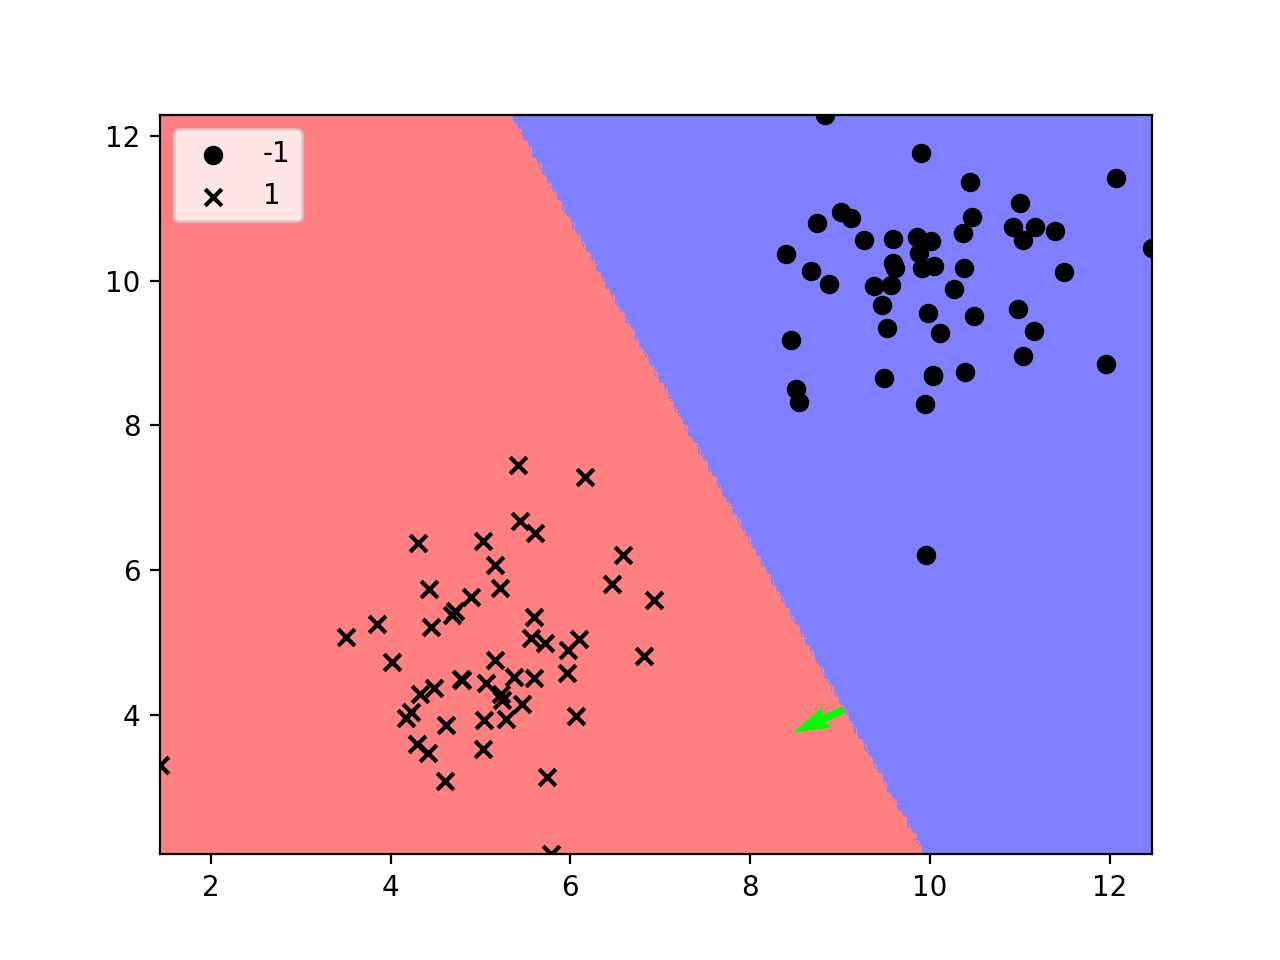

Training error: 0.00 %


In [56]:
%matplotlib notebook
visualize_classfier(xTr, yTr, w, b)

# Calculate the training error
err=np.mean(np.sign(xTr.dot(w) + b)!=yTr)
print("Training error: {:.2f} %".format (err*100))

<h3>Interactive Demo</h3>

Running the code below will create an interactive window where you can click to add new data points to see how your linear SVM will respond. There may be a significant delay between clicks.

<IPython.core.display.Javascript object>


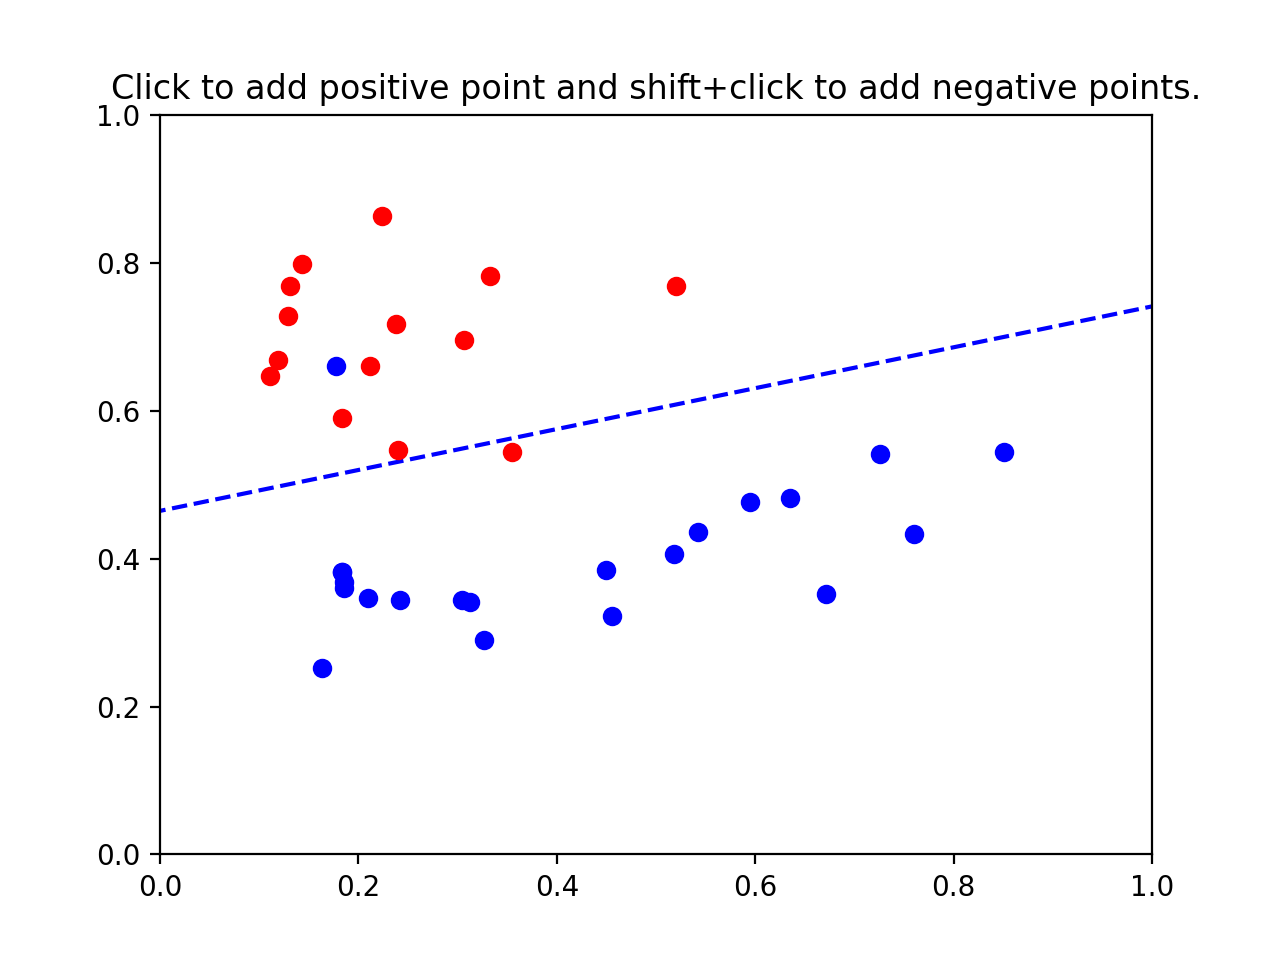

In [57]:
Xdata = []
ldata = []

fig = plt.figure()
details = {
    'w': None,
    'b': None,
    'stepsize': 1,
    'ax': fig.add_subplot(111), 
    'line': None
}

plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Click to add positive point and shift+click to add negative points.')

def updateboundary(Xdata, ldata):
    global details
    w_pre, b_pre, _ = minimize(objective=loss, grad=grad, xTr=np.concatenate(Xdata), 
            yTr=np.array(ldata), C=1000)
    details['w'] = np.array(w_pre).reshape(-1)
    details['b'] = b_pre
    details['stepsize'] += 1

def updatescreen():
    global details
    b = details['b']
    w = details['w']
    q = -b / (w**2).sum() * w
    if details['line'] is None:
        details['line'], = details['ax'].plot([q[0] - w[1],q[0] + w[1]],[q[1] + w[0],q[1] - w[0]],'b--')
    else:
        details['line'].set_ydata([q[1] + w[0],q[1] - w[0]])
        details['line'].set_xdata([q[0] - w[1],q[0] + w[1]])


def generate_onclick(Xdata, ldata):    
    global details

    def onclick(event):
        if event.key == 'shift': 
            # add positive point
            details['ax'].plot(event.xdata,event.ydata,'or')
            label = 1
        else: # add negative point
            details['ax'].plot(event.xdata,event.ydata,'ob')
            label = -1    
        pos = np.array([[event.xdata, event.ydata]])
        ldata.append(label)
        Xdata.append(pos)
        updateboundary(Xdata,ldata)
        updatescreen()
    return onclick


cid = fig.canvas.mpl_connect('button_press_event', generate_onclick(Xdata, ldata))
plt.show()

### Scikit-learn Implementation

Scikit-learn also provides a [Linear SVM Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) implementation that is easy to use.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<IPython.core.display.Javascript object>


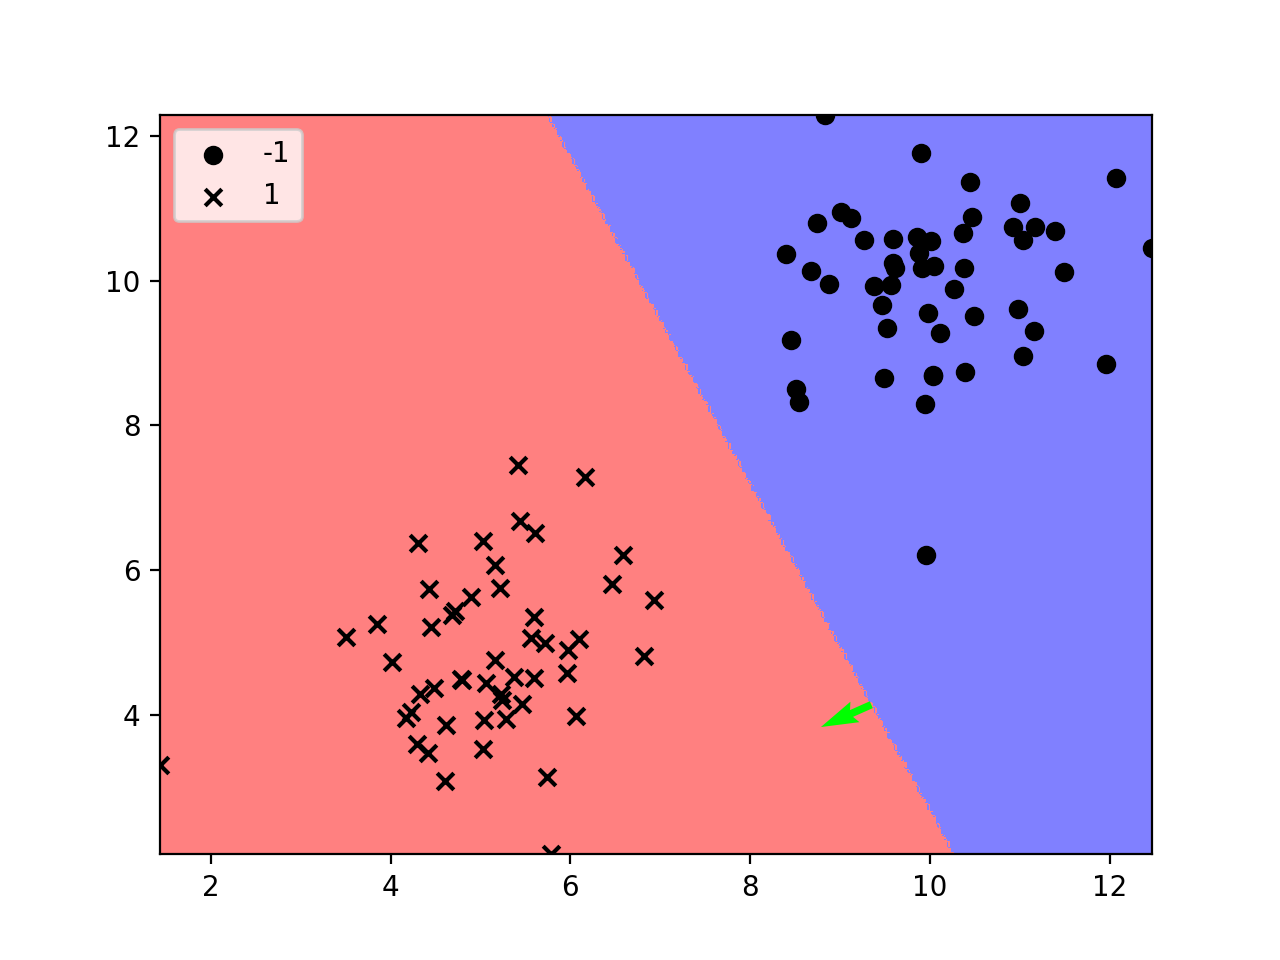

Training error: 0.00 %


In [58]:
from sklearn.svm import LinearSVC

clf = LinearSVC(penalty='l2', loss='squared_hinge', C=1000, max_iter=1000, random_state=0)
clf.fit(xTr, yTr)

# Visualize classifier and calculate training error
visualize_classfier(xTr, yTr, clf.coef_, clf.intercept_)

err=np.mean(clf.predict(xTr) != yTr)
print("Training error: {:.2f} %".format (err*100))